In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
city_load = 'Resources/city_data.csv'
ride_load = 'Resources/ride_data.csv'

city_data_df = pd.DataFrame(pd.read_csv(city_load))
ride_data_df = pd.DataFrame(pd.read_csv(ride_load))

In [4]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
city_columns = list(city_data_df.columns)
ride_columns = list(ride_data_df.columns)
print("CITY DATA COLUMNS:  " + "    ".join(city_columns))
print("RIDE DATA COLUMNS:  " + "    ".join(ride_columns))



CITY DATA COLUMNS:  city    driver_count    type
RIDE DATA COLUMNS:  city    date    fare    ride_id


In [7]:
#checking for null values:
print(city_data_df.count())
print()
print(city_data_df.isnull().sum())


city            120
driver_count    120
type            120
dtype: int64

city            0
driver_count    0
type            0
dtype: int64


In [8]:
print(ride_data_df.count())
print()
print(ride_data_df.isnull().sum())

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

city       0
date       0
fare       0
ride_id    0
dtype: int64


# All Clear! No Null Values

In [9]:
#Get DataTypes of each DF
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [11]:
cdd_u = list(city_data_df["type"].unique())
print("Unique Entries in city_data_df['type']:  \n\n" + "  ".join(cdd_u))

Unique Entries in city_data_df['type']:  

Urban  Suburban  Rural


In [12]:
#sum(city_data_df["type"]=="Urban")  -- Why would i use this over value_counts()...?
city_data_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [13]:
#MERGE DATAFRAMES
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [14]:
# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# Make a DataFrame for Each Type of City - 5.3.1

In [15]:
#URBAN
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
#SUBURBAN
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [17]:
#RURAL
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


# Make Series of Ride Counts Per City In Each Type 5.3.2

In [18]:
#URBAN
urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
#SUBURBAN
suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [20]:
#RURAL
rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

# Avg Fare per City Type - 5.3.3

In [21]:
#URBAN
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [22]:
#SUBURBAN
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [23]:
#RURAL
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

# Avg # of Drivers for Each City in Each Type - 5.3.4

In [24]:
#URBAN
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [25]:
#SUBURBAN
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [26]:
#RURAL
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

# Scatter Plot - 5.3.5
### The x-axis is the number of rides for each city.
### The y-axis is the average fare for each city.
### The size of each marker is the average number of drivers in each city.


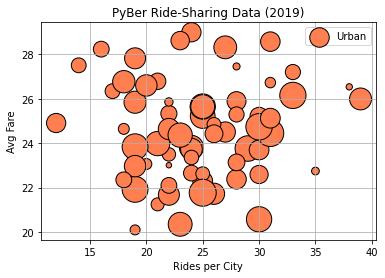

In [27]:
#SCATTER 1 - URBAN ONLY
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=[i*10 for i in urban_driver_count], 
            edgecolor="black", color='coral',label="Urban")

plt.title("PyBer Ride-Sharing Data (2019)")

plt.xlabel("Rides per City")
plt.ylabel("Avg Fare")
plt.legend()

plt.grid()

plt.show()

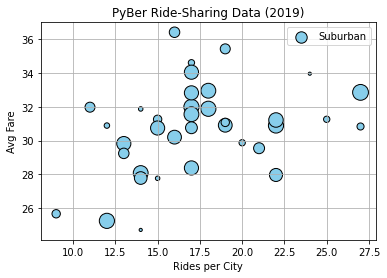

In [28]:
#SCATTER 2 - SUBURBAN ONLY
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=[i*10 for i in suburban_driver_count],
           edgecolor="black", color="skyblue", label="Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")

plt.xlabel("Rides per City")
plt.ylabel("Avg Fare")
plt.legend()

plt.grid()
plt.show()

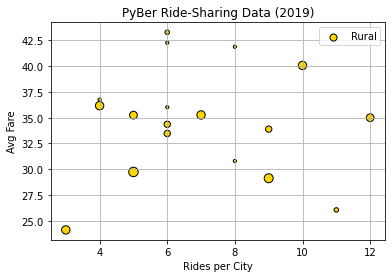

In [29]:
#SCATTER 3 - RURAL ONLY
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=[i*10 for i in rural_driver_count],
           edgecolor="black", color="gold", label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")

plt.xlabel("Rides per City")
plt.ylabel("Avg Fare")
plt.legend()

plt.grid()
plt.show()

# Combine 3 Scatters Into 1 - 5.3.6

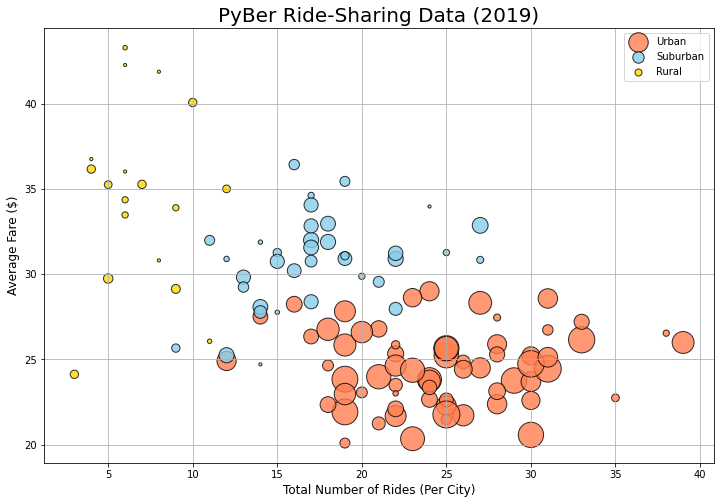

In [30]:
plt.subplots(figsize=(12,8))
#SCATTER 1 - URBAN ONLY
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=[i*10 for i in urban_driver_count], 
            edgecolor="black", color='coral',
            alpha=0.8, label="Urban")

#SCATTER 2 - SUBURBAN ONLY
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=[i*10 for i in suburban_driver_count],
           edgecolor="black", color="skyblue", 
            alpha=0.8, label="Suburban")

#SCATTER 3 - RURAL ONLY
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=[i*10 for i in rural_driver_count],
           edgecolor="black", color="gold", 
            alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)

plt.legend()
plt.grid()

plt.show()

## Fixing the Legend Above - See how it's bad?

#Create a legend object
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

## Now adding the legend to the plot

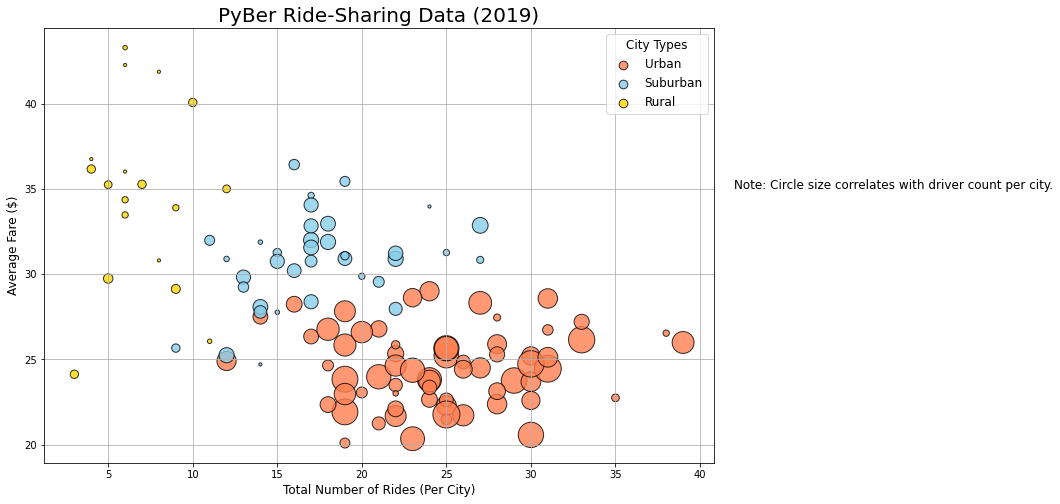

In [31]:
plt.subplots(figsize=(12,8))
#SCATTER 1 - URBAN ONLY
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=[i*10 for i in urban_driver_count], 
            edgecolor="black", color='coral',
            alpha=0.8, label="Urban")

#SCATTER 2 - SUBURBAN ONLY
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=[i*10 for i in suburban_driver_count],
           edgecolor="black", color="skyblue", 
            alpha=0.8, label="Suburban")

#SCATTER 3 - RURAL ONLY
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=[i*10 for i in rural_driver_count],
           edgecolor="black", color="gold", 
            alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)

#Create a legend object--------------------------------------
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)
#-------------------------------------------------------------

plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.grid()

plt.savefig("analysis/Fig1.png")

plt.show()


# 5.4.1 - Statistical Analysis


In [32]:
urban_cities_df.describe(), suburban_cities_df.describe(), rural_cities_df.describe()




(              fare       ride_id  driver_count
 count  1625.000000  1.625000e+03   1625.000000
 mean     24.525772  4.873485e+12     36.678154
 std      11.738649  2.907440e+12     20.075545
 min       4.050000  1.458810e+10      3.000000
 25%      14.550000  2.400244e+12     22.000000
 50%      24.640000  4.711188e+12     37.000000
 75%      34.580000  7.451579e+12     52.000000
 max      44.970000  9.991538e+12     73.000000,
              fare       ride_id  driver_count
 count  625.000000  6.250000e+02    625.000000
 mean    30.970128  4.971015e+12     13.712000
 std     10.677508  2.912410e+12      8.042372
 min     12.050000  3.218337e+08      1.000000
 25%     21.970000  2.364253e+12      5.000000
 50%     30.750000  5.053221e+12     16.000000
 75%     39.830000  7.551674e+12     21.000000
 max     49.960000  9.917744e+12     25.000000,
              fare       ride_id  driver_count
 count  125.000000  1.250000e+02    125.000000
 mean    34.623440  4.647746e+12      4.296000
 s

In [33]:
urban_ride_count.describe(), suburban_ride_count.describe(), rural_ride_count.describe()

(count    66.000000
 mean     24.621212
 std       5.408726
 min      12.000000
 25%      21.000000
 50%      24.000000
 75%      28.000000
 max      39.000000
 Name: ride_id, dtype: float64,
 count    36.000000
 mean     17.361111
 std       4.323707
 min       9.000000
 25%      14.000000
 50%      17.000000
 75%      19.250000
 max      27.000000
 Name: ride_id, dtype: float64,
 count    18.000000
 mean      6.944444
 std       2.508157
 min       3.000000
 25%       5.250000
 50%       6.000000
 75%       8.750000
 max      12.000000
 Name: ride_id, dtype: float64)

In [34]:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)


(24.62, 17.36, 6.94)

In [35]:
print(f"Median of Urban Rides: {urban_ride_count.median()}")
print(f"Mode of Urban Rides: \n{urban_ride_count.mode()}")

Median of Urban Rides: 24.0
Mode of Urban Rides: 
0    22
1    25
dtype: int64


In [36]:
print(f"Mode for # of Rides in Suburban Cities: \n{suburban_ride_count.mode()}")

Mode for # of Rides in Suburban Cities: 
0    17
dtype: int64


In [38]:
#Using NUMPY and scipy
import numpy as np

import scipy.stats as sts

In [40]:
# Calculate the measures of central tendency for the ride count for the urban cities.

mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [43]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))

# 5.4.2

In [47]:
# Get the fares for the urban cities.

urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [48]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [49]:
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [50]:
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares =np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


# 5.4.3 - Stats for the Number of Drivers by City Type
##### The test question in this module asking for mean of suburban drivers was rounded up. May cause issues

In [51]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [52]:
def driver_statistics(data, string_of_type):
    x = np.mean(data)
    y = np.median(data)
    z = sts.mode(data)
    print(f"The average number of drivers in a {string_of_type} city is: {x:.2f}")
    print(f"The Median Number of Drivers in a {string_of_type} city is: {y:.2f}")
    print(f"The Modes of the Number of Drivers in a {string_of_type} city is/are: \n{z}")
    

In [53]:
#URBAN DRIVERS
driver_statistics(urban_drivers, "Urban")

The average number of drivers in a Urban city is: 36.68
The Median Number of Drivers in a Urban city is: 37.00
The Modes of the Number of Drivers in a Urban city is/are: 
ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [55]:
#SUBURBAN DRIVERS
driver_statistics(suburban_drivers, "Suburban")

The average number of drivers in a Suburban city is: 13.71
The Median Number of Drivers in a Suburban city is: 16.00
The Modes of the Number of Drivers in a Suburban city is/are: 
ModeResult(mode=array([20], dtype=int64), count=array([79]))


In [56]:
#RURAL DRIVERS
driver_statistics(rural_drivers, "Rural")

The average number of drivers in a Rural city is: 4.30
The Median Number of Drivers in a Rural city is: 4.00
The Modes of the Number of Drivers in a Rural city is/are: 
ModeResult(mode=array([1], dtype=int64), count=array([32]))


# 5.4.4 - Box-And-Whisker

In [60]:
#MAKING A BOX AND WHISKER BASED ON OUR URBAN_RIDE_COUNT SERIES
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

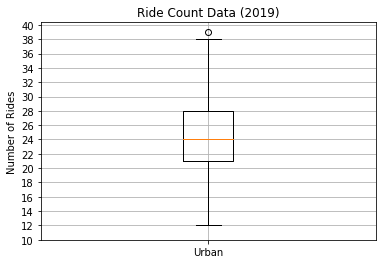

In [71]:
#ONLY URBAN
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))

ax.grid()
plt.show()

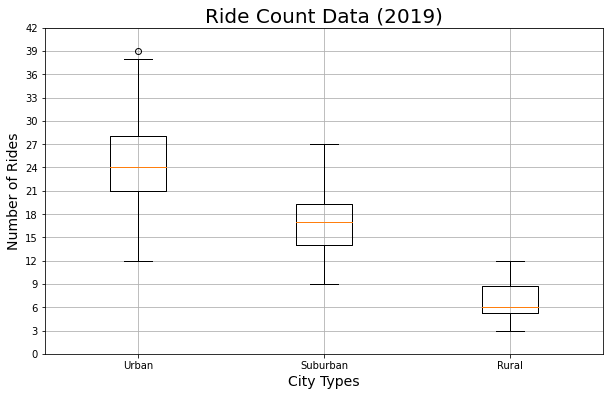

In [72]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [74]:
#WE HAVE AN OUTLIER IN THE URBAN BOXPLOT - MARKED WITH A CIRCLE, USE A SIMPLE CONDITIONAL TO FIND THAT VALUE
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


# BOX AND WHISKER PLOTS FOR RIDE FARE DATA

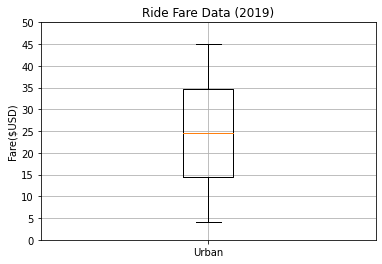

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [75]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

In [76]:
#COMBINED

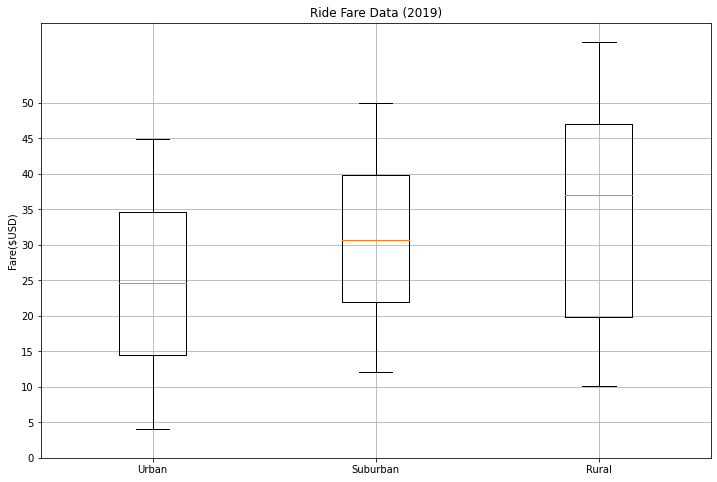

In [81]:
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot(fare_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.savefig('analysis/ride_fare_data.png')
plt.show()


# BOX AND WHISKER PLOTS FOR DRIVER COUNT DATA

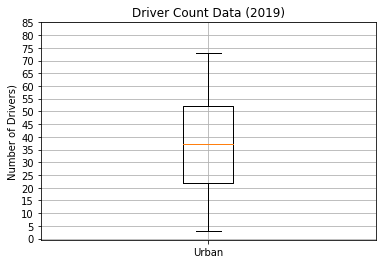

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [82]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

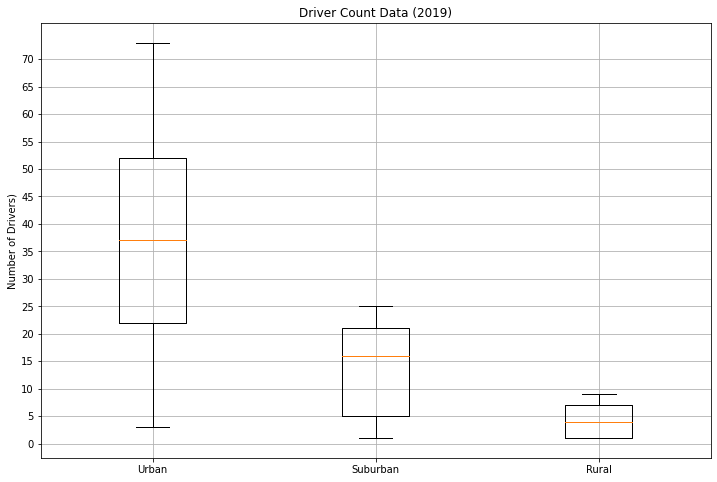

Summary Statistics

URBAN
count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

SUBURBAN
count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

RURAL
count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64


In [87]:
#SKILL DRILLS
x_labels = ["Urban", "Suburban","Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot(driver_data,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 75, step=5.0))

ax.grid()
plt.show()

print("Summary Statistics\n")
print("URBAN")
print(urban_drivers.describe())

print("\nSUBURBAN")
print(suburban_drivers.describe())

print("\nRURAL")
print(rural_drivers.describe())

# 5.5.1 - PERCENTAGE OF FARES FOR EACH CITY TYPE - PIE CHART

In [92]:
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type 

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [93]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [94]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

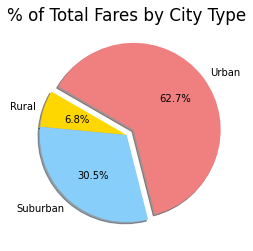

In [111]:
#IMPORT MATPLOTLIB WITHOUT PYPLOT TO ADJUST FONT SIZE FOR PIE CHARTS
import matplotlib as mpl

plt.pie(type_percents, labels=["Rural","Suburban","Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct="%1.1f%%",
       shadow=True, startangle=150)

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig5.png")

plt.title("% of Total Fares by City Type")


plt.show()